In [ ]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
Consumer_Key = "MWMGxMDqoUFZgybCZuw8m7Jfw"
Consumer_Secret_Key = "8vwqmphfj2nHDiGamUWjGbknmWBbvGEivVIha4Oc3FBTuMTt8j" 
Access_Token = "1570376087703789571-2lZQvTlc7kokyY6iOLdJh9S3TKkpg0"
Access_Token_Secret = "JSvgBe7459AkkMJc0t18wx0x7Al5jiJM6tmNKhTl0TXgm"

In [ ]:
auth = tweepy.OAuthHandler(Consumer_Key,Consumer_Secret_Key)
auth.set_access_token(Access_Token,Access_Token_Secret)
api = tweepy.API(auth)

In [ ]:
posts = api.user_timeline(screen_name="indosatim3", count = 1000, lang = "id", tweet_mode = "extended")

# Print the last 5 tweets
print("Show the 5 recent:\n")
i=1
for tweet in posts[:5]:
  print(str(i)+') '+tweet.full_text +'\n')
  i = i+1

Show the 5 recent:

1) @alhakim31 Hi Kak, mohon maaf ya sebelumnya terkait notifikasi yang di dapat sudah mimin bantu balas via DM, yuk cus cek DM nya ya kak. Thanks^Bob  https://t.co/IGGiVZgYmt

2) @aditjeks Kembali kasih kak mimin jadi ikut seneng juga nih kak, apabila ada pertanyaan atau kendala jangan ragu untuk DM atau mention kami di @Indosatcare ya kak. Salam^Leon. https://t.co/IGGiVZgYmt

3) @jagoan_hoki Halo kak, ada keluhan apa nih? yuk ceritain aja via DM nanti biar Hadid bantu lebih lanjut ya kak. Salam^Hadid

4) @fikarurazzan_ Hallo Kak Fikar, maaf banget nih Kak. Kalau untuk nomor yang sudah lama hangus itu sudah tidak bisa di aktifkan kembali ya Kak. Salam ^Nina

5) @nuggetmecdii Hallo Kak, maaf ya Kak buat pengalamannya. Mimin bantu infoin lewat DM ya Kak. Yuk cek DM nya. Salam ^Nina https://t.co/IGGiVZgYmt



In [ ]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
df.head()

,Tweets
0,"@alhakim31 Hi Kak, mohon maaf ya sebelumnya te..."
1,@aditjeks Kembali kasih kak mimin jadi ikut se...
2,"@jagoan_hoki Halo kak, ada keluhan apa nih? yu..."
3,"@fikarurazzan_ Hallo Kak Fikar, maaf banget ni..."
4,"@nuggetmecdii Hallo Kak, maaf ya Kak buat peng..."


In [ ]:
def cleanTxt(text):
  text = re.sub('@[A-Za-z0-9]+', '', text)
  text = re.sub('#', '', text)
  text = re.sub('RT[\s]+', '', text)
  text = re.sub('https?:\/\/\S+', '', text)
  text = re.sub('_','',text)
  text = re.sub('yang','',text)
  text = re.sub('terimakasih','',text)
  text = re.sub('Yuk!','',text)
  text = re.sub('ya!','',text)
  text = re.sub('[^0-9A-Za-z \t]','',text)
  text = re.sub('(\w+:\/\/\S+)','',text) 

  return text

df['Tweets'] = df['Tweets'].apply(cleanTxt)

df

,Tweets
0,Hi Kak mohon maaf ya sebelumnya terkait notif...
1,Kembali kasih kak mimin jadi ikut seneng juga...
2,hoki Halo kak ada keluhan apa nih yuk ceritain...
3,Hallo Kak Fikar maaf banget nih Kak Kalau unt...
4,Hallo Kak maaf ya Kak buat pengalamannya Mimi...
...,...
195,k Hello kakak Kevin baik sebelum kami bantu pe...
196,luue Hai Kak maaf atas pengalaman dirasakan B...
197,Hai Kak maaf ya kak untuk kondisinya Silahkan...
198,Hai Kak Bella maaf buat pengalamannya ya Suda...


In [ ]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df

,Tweets,Subjectivity,Polarity
0,Hi Kak mohon maaf ya sebelumnya terkait notif...,0.0,0.0
1,Kembali kasih kak mimin jadi ikut seneng juga...,0.0,0.0
2,hoki Halo kak ada keluhan apa nih yuk ceritain...,0.0,0.0
3,Hallo Kak Fikar maaf banget nih Kak Kalau unt...,0.0,0.0
4,Hallo Kak maaf ya Kak buat pengalamannya Mimi...,0.0,0.0
...,...,...,...
195,k Hello kakak Kevin baik sebelum kami bantu pe...,0.0,0.0
196,luue Hai Kak maaf atas pengalaman dirasakan B...,0.0,0.0
197,Hai Kak maaf ya kak untuk kondisinya Silahkan...,0.0,0.0
198,Hai Kak Bella maaf buat pengalamannya ya Suda...,0.0,0.0


<function matplotlib.pyplot.show(*args, **kw)>

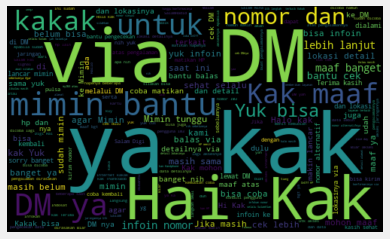

In [ ]:
allwords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=10, max_font_size=110).generate(allwords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show

In [ ]:
def getAnalysis(score):

  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,Hi Kak mohon maaf ya sebelumnya terkait notif...,0.0,0.0,Neutral
1,Kembali kasih kak mimin jadi ikut seneng juga...,0.0,0.0,Neutral
2,hoki Halo kak ada keluhan apa nih yuk ceritain...,0.0,0.0,Neutral
3,Hallo Kak Fikar maaf banget nih Kak Kalau unt...,0.0,0.0,Neutral
4,Hallo Kak maaf ya Kak buat pengalamannya Mimi...,0.0,0.0,Neutral
...,...,...,...,...
195,k Hello kakak Kevin baik sebelum kami bantu pe...,0.0,0.0,Neutral
196,luue Hai Kak maaf atas pengalaman dirasakan B...,0.0,0.0,Neutral
197,Hai Kak maaf ya kak untuk kondisinya Silahkan...,0.0,0.0,Neutral
198,Hai Kak Bella maaf buat pengalamannya ya Suda...,0.0,0.0,Neutral


In [ ]:
print('Printing negative tweets:\n')
j=i
sortedDF = df.sort_values(by=['Polarity'],ascending=False)
for i in range(0,sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

6)  Hai Kak sorry nih untuk pengalamannya Agar yuk bisa infoin nomor Kakak via DM agar dapat Mimin bantu cek lebih lanjtu yah SalamOvi 

7) wadu Hai kak duh maaf banget ya kak Yuk bisa coba matikan hapenya beberapa saat ya amp bisa dicoba lagi aksesnya Apabila sudah dicoba namun masih belum bisa juga yuk infoin ke Mimin nomor dan lokasinya via DM ya kak Terima kasih sehat selalu Salam Digi 

8)  Hai Kak duhhh maaf banget ya Kak untuk jaringan di nomor Kakak  belum stabil Terkait hal tersebut yuk bisa kita obrolin via DM yuk Kak Udah Mimin infoin detailnya via DM nih Kak Mimin tungguin di DM ya Kak Mala 

9)   Sorry bgt ya Kak biar jaringannya makin lancar untk langkah awal bisa coba OFF ON kan HP kemudian coba lagi ya Kalau masih blm bisa yuk infoin nomor hp lokasi detail dan nmr alternatif ke DM ya kak agar mimin bisa cek lebih lanjutLeo 

10) Mo Hai kak sorry banget untuk  dialami ya kak Mimin sudah balas via DM ya kak Yuk cek DM dari mimin Fafa 

11)  Hai 

In [ ]:
print('Printing positive tweets:\n')
j=i
sortedDF = df.sort_values(by=['Polarity'],ascending=True)
for i in range(0,sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing positive tweets:

199)  Hola kak maaf ya sebelumnya Kalo masih belum bisa kuy infoin nomor dan lokasinya via DM Biar mimin bantu cek cek lebih lanjut Have a nice day Izy 

200) spore Baik kak mimin bantu konfirmasi melalui DM ya kak Thanks Izy

201)  Hola kak maaf ya sebelumnya Bisa coba dulu matikan hpnya 510 menit kemudian nyalakan kembali kalo masih belum bisa kuy infoin nomor dan lokasinya via DM Biar mimin bantu cek cek lebih lanjut Have a nice day Izy 

202)  Hai Kak ada yg bisa Mimin bantu Bisa infoin pertanyaan atau pengalaman  dialami serta nomornya juga ya ka via DM akan Mimin bantu Have a good dayOvi 

203)  Okay kak infoin juga nomor IM3 kakak di DM yahVit

204) cribo Hai Kak mohon maaf yah atas pengalamannya Kakak udah coba untuk Off  On kan Handphone belum Misal udah dan masih sama yuk infoin nomor Kakak lokasi detail beserta nomor alternatif via DM agar Mimin bantu cek lebih lanjut Have a great dayOvi  

205)  Hola kak maaf ya sebelumnya Bisa coba dulu matikan h

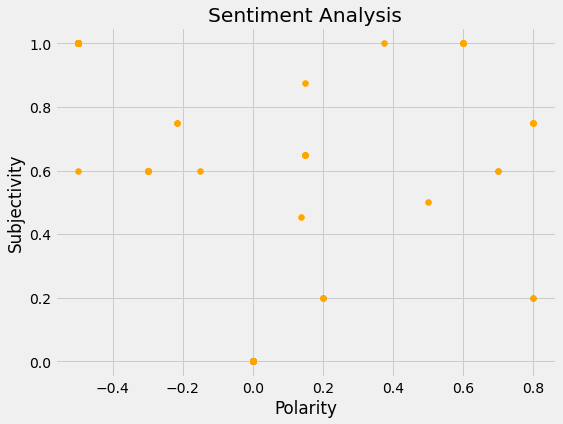

In [ ]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Orange')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

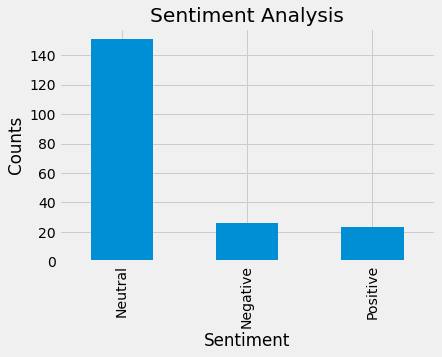

In [ ]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
df['Analysis'].value_counts()

Neutral     151
Negative     26
Positive     23
Name: Analysis, dtype: int64